In [1]:
import os
import glob
import numpy as np
import clima_anom as ca
import matplotlib.pyplot as plt
import matplotlib.cbook
import matplotlib.gridspec as gridspec
import cartopy
import cartopy.crs as ccrs

## TRMM 3B42 v7 daily accumulated

In [2]:
year_start = 1999
year_end = 2013

In [3]:
pre_dir = "/media/arturo/Arturo/Data/TRMM/3B42_v7_1dy/raw/*.nc4"
pre_list = glob.glob(pre_dir)
pre_list = sorted(pre_list)
len_list = len(pre_list)
print(pre_dir)

/media/arturo/Arturo/Data/TRMM/3B42_v7_1dy/raw/*.nc4


In [4]:
pre_list_new = []
for t in range(len_list):
    time_pre = pre_list[t].split('/')[-1].split('.')[1]
    year = time_pre[0:4]
    month = time_pre[4:6]
    if int(year) >= year_start and int(year) <= year_end:
        pre_list_new.append(pre_list[t])

In [5]:
time_len = len(pre_list_new)
time_s = pre_list_new[0].split('/')[-1]
time_e = pre_list_new[-1].split('/')[-1]
print(f'Start Time: {time_s}')
print(f'End Time  : {time_e}')
print(f'Times     : {time_len}')

Start Time: 3B42_Daily.19990101.7.nc4.nc4
End Time  : 3B42_Daily.20131231.7.nc4.nc4
Times     : 5479


In [6]:
tmp = ca.read_netcdf(pre_list_new[0],1)
lat = tmp["lat"].data
lon = tmp["lon"].data

nlat = len(lat)
nlon = len(lon)

lon2d, lat2d = np.meshgrid(lon, lat)

print('Lat:',lat.shape)
print('Lon:',lon.shape)

Number of variables:  5
Lat: (280,)
Lon: (261,)


In [7]:
salida = np.zeros([time_len,nlat,nlon])
for nn in range(time_len):
    data = ca.read_netcdf(pre_list_new[nn],0)
    prec = np.array(data["precipitation"]).T
    prec[prec<=0]=0
    salida[nn,:,:] = prec

In [11]:
prec_mean = np.mean(salida,axis=0)
prec_max = np.max(salida,axis=0)
prec_sum = np.sum(salida,axis=0)

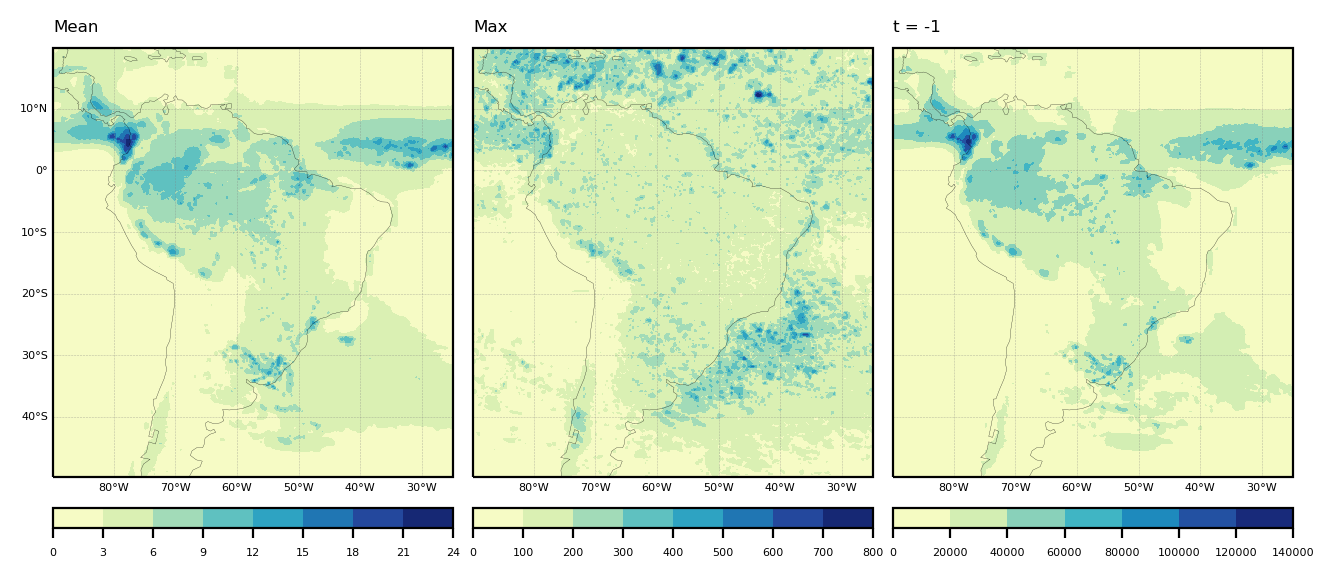

In [12]:
linewidth_shape = 0.2

levels = None

proj = ccrs.PlateCarree()
cmap = plt.cm.YlGnBu

fig = plt.figure(figsize=(8,4),dpi=200)
gs = gridspec.GridSpec(1,3)

ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.coastlines(linestyle='-',linewidth=0.1,color='black',zorder=4)
a1 = ax1.contourf(lon2d, lat2d,prec_mean,levels = levels, cmap=cmap)
gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = True
gl.right_labels = False
gl.xlabel_style = {'size': 4, 'color': 'k'}
gl.ylabel_style = {'size': 4, 'color': 'k'}
cbar1 = plt.colorbar(a1,orientation='horizontal',pad=0.05)
cbar1.ax.tick_params(labelsize=4)
ax1.set_title('Mean',fontsize=6,loc='left')

ax2 = plt.subplot(gs[0, 1], projection = proj)
ax2.coastlines(linestyle='-',linewidth=0.1,color='black',zorder=4)
a2 = ax2.contourf(lon2d, lat2d,prec_max,levels = levels, cmap=cmap)
gl = ax2.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 4, 'color': 'k'}
gl.ylabel_style = {'size': 4, 'color': 'k'}
cbar2 = plt.colorbar(a2,orientation='horizontal',pad=0.05)
cbar2.ax.tick_params(labelsize=4)
ax2.set_title('Max',fontsize=6,loc='left')

ax3 = plt.subplot(gs[0, 2], projection = proj)
ax3.coastlines(linestyle='-',linewidth=0.1,color='black',zorder=4)
a3 = ax3.contourf(lon2d, lat2d,prec_sum,levels = levels, cmap=cmap)
gl = ax3.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 4, 'color': 'k'}
gl.ylabel_style = {'size': 4, 'color': 'k'}
cbar3 = plt.colorbar(a3,orientation='horizontal',pad=0.05)
cbar3.ax.tick_params(labelsize=4)
ax3.set_title('t = -1',fontsize=6,loc='left')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, hspace=0.02, wspace=0.05)

In [17]:
file_name_out = "/media/arturo/Arturo/Data/TRMM/3B42_v7_1dy/3B42_"+str(year_start)+"_01_"+str(year_end)+"_12_1dy_025x025.nc"
print(file_name_out)

/media/arturo/Arturo/Data/TRMM/3B42_v7_1dy/3B42_1999_01_2013_12_1dy_025x025.nc


In [18]:
print(np.shape(salida))
info = {'file': file_name_out,
        'title': 'TRMM 3B42 v7 precipitation', 
        'year_start':year_start,'month_start':1,'day_start':1,'hour_start':0,'minute_start':0,
        'year_end':year_end,'month_end':12,'day_end':31,'hour_end':23,'minute_end':55,
        'time_frequency': 'daily', 
        'time_interval': 1,
        'var_name': 'prec', 
        'var_units': 'mm/dy'} 

(5479, 280, 261)


In [19]:
ca.create_netcdf(info, salida, lat, lon)

Time Start: 1999-01-01 00:00:00
Time End: 2013-12-31 00:00:00
Time Frequency: daily
Time Lenght: 5479

File created in:  /media/arturo/Arturo/Data/TRMM/3B42_v7_1dy/3B42_1999_01_2013_12_1dy_025x025.nc
File title:  TRMM 3B42 v7 precipitation
var title:  prec
var units:  mm/dy
